# การจัดการข้อมูลขั้นพื้นฐานด้วย `pandas` 

ไลบรารี `pandas` เป็นไลบรารีที่สำคัญที่สุดในวิทยาการข้อมูล (data science) อาจจะนับได้ด้วยซ้ำว่าหลายคนเรียนเขียนโปรแกรมเป็นภาษาไพธอนเพื่อที่จะได้ใช้ `pandas` ได้ 

รูปแบบของข้อมูลที่เรามักจะเจอและใช้กันคือข้อมูลที่อยู่ในรูปแบบของตาราง (tabular data) ซึ่งเป็นรูปแบบข้อมูลที้ `pandas` มีฟังก์ชันต่าง ๆ ที่ช่วยในการจัดการข้อมูลดังนี้

1. การทำความสะอาดข้อมูล (data cleaning) คือ การคัดแยกข้อมูลที่สกปรกออกไป เช่น ข้อมูลที่สมบูรณ์ สั้นเกินไป ยาวเกินไป ผิดเพี้ยน หรือข้อความมีข้อมูลเราไม่ต้องการเช่น url หรือเครื่องหมายวรรคตอน หรือ สิ่งอื่น ๆ ที่อาจจะทำให้การวิเคราะห์ข้อมูลคลาดเคลื่อนไปได้
2. การวิเคราะห์ข้อมูลเชิงสำรวจ (exploratory data analysis: EDA) คือ การวิเคราะห์เพื่อให้เราเข้าใจข้อมูลคร่าว ๆ เนื่องจากข้อมูลมักจะมีขนาดใหญ่มาก เราไม่สามารถนำข้อมูลออกมาดูได้ทั้งหมด เรามักจะทำ EDA โดยดูว่าข้อมูลมีทั้งหมดที่แถว แต่ละคอลัมน์เก็บข้อมูลอะไรอยู่บ้าง แต่ละคอลัมน์มีค่าสูงสุด ต่ำสุดเท่าไร ถ้าเป็นข้อความ ข้อความที่ยาวสุดยาวกี่ตัวอักษร สั้นสุดกี่ตัวอักษร เป็นต้น 
3. การขยำข้อมูล (data munging หรือ data wrangling) คือ การแปลงข้อมูลจากรูปเดิม นำมาทำความสะอาด และคัดให้เหลืออยู่เฉพาะส่วนที่สำคัญเพื่อนำไปวิเคราะห์ต่อ เช่น ลบคอลัมน์ที่ไม่เกี่ยวข้องกับการวิเคราะห์  เปลี่ยนชื่อคอลัมน์ให้สื่อความหมาย ลบคอลัมน์ที่ซ้ำซ้อนกันออกไป ลบแถวที่มีข้อมูลที่สกปรก คลาดเคลื่อนมากจนใช้การไม่ได้ หรือลบแถวที่ซ้ำซ้อนกันออกไป 

`pandas` มีฟังก์ชันเยอะมากเพื่อรองรับการวิเคราะห์ข้อมูลในรูปแบบที่หลากหลาย ฟังก์ชันที่เราจำเป็นต้องรู้มีดังนี้
1. การสร้าง `DataFrame`
1. โหลดข้อมูลเข้า `DataFrame` จากไฟล์ข้อมูล 
1. เลือกบางคอลัมน์
1. เลือกบางแถว
1. คำนวณสถิติของแต่ละคอลัมน์
1. คำนวณสถิติของแต่ละคอลัมน์ แบบแยกกลุ่มก่อน (aggregation)
1. การเพิ่มคอลัมน์
1. การเซฟข้อมูลลงใส่ไฟล์

## การสร้าง `DataFrame`
DataFrame คือตาราง ประกอบไปด้วยแถวและคอลัมน์ 

In [2]:
import pandas as pd
mydata = pd.DataFrame(
    {'student name': ['pang', 'dream', 'tangmay'],
     'age': [20, 19, 19]
    }
)
mydata

,student name,age
0,pang,20
1,dream,19
2,tangmay,19


In [3]:
mydata = pd.DataFrame(
    [{'student name': 'pang', 'age': 20}, 
     {'student name': 'dream', 'age': 19},
     {'student name':'tangmay', 'age': 19}
    ]
)
mydata

,student name,age
0,pang,20
1,dream,19
2,tangmay,19


## โหลดข้อมูลเข้า `DataFrame` จากไฟล์ข้อมูล 
ส่วนใหญ่เราจะอ่านข้อมูลจาก csv file

* `pd.read_csv` อ่านข้อมูลจาก csv 


In [3]:
import pandas as pd
d = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')
d

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## การเลือกแค่บางคอลัมน์ <a id="columns"></a>
- เลือกหลายคอลัมน์พร้อม ๆ กัน ด้วย `[]` เช่น
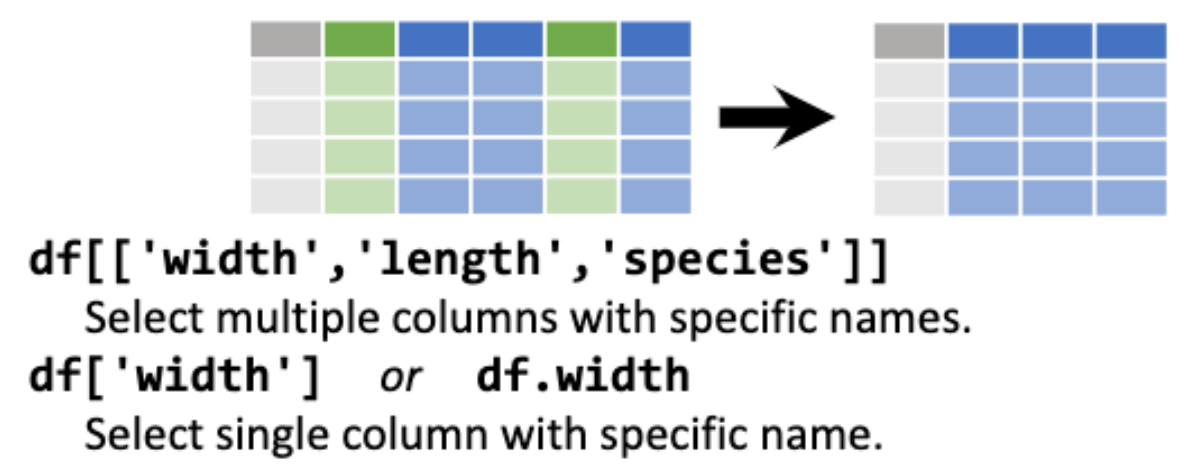

In [5]:
d[['class', 'sepallength']]

,class,sepallength
0,Iris-setosa,5.1
1,Iris-setosa,4.9
2,Iris-setosa,4.7
3,Iris-setosa,4.6
4,Iris-setosa,5.0
...,...,...
145,Iris-virginica,6.7
146,Iris-virginica,6.3
147,Iris-virginica,6.5
148,Iris-virginica,6.2


เลือกคอลัมน์เดียวโดยการใช้ `[]` แต่ว่าป้อนแค่สตริงที่เป็นชื่อคอลัมน์ที่ต้องการ คำสั่งนี้จะให้รีเทิร์น `Series` มาให้ซึ่งเป็น object ที่สามารถเรียก method อื่น ๆ ต่ออีกได้

In [6]:
d.sepallength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallength, Length: 150, dtype: float64

## การเลือกบางแถว <a id="rows"></a>

* `df.sample(frac=0.5)` สุ่มมาครึ่งนึงของแถวทั้งหมด
* `df.sample(n=10)` สุ่มมาสิบตัว
* `df.head(n)` เลือก n แถวแรก
* `df.tail(n)` เลือก n แถวหลัง
* `df.iloc[5:10]` เลือกแถว 5, 6, 7, 8, 9 
* `df[df.pos_tag = 'VERB']` เลือกแถวตามเกณฑ์ boolean 

In [14]:
d.sample(frac=0.5, random_state=12)

,sepallength,sepalwidth,petallength,petalwidth,class
40,5.0,3.5,1.3,0.3,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
143,6.8,3.2,5.9,2.3,Iris-virginica
...,...,...,...,...,...
105,7.6,3.0,6.6,2.1,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica


In [13]:
d.sample(frac=0.5, random_state=12).iloc[[0,1,2]] #ตำแหน่งจากบนลงล่าง

,sepallength,sepalwidth,petallength,petalwidth,class
40,5.0,3.5,1.3,0.3,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa


In [15]:
d.sample(frac=0.5, random_state=12).loc[[0,140, 131]] # ชื่อ (index)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica


In [7]:
#d[d['class'] == 'Iris-virginica']  # select * from d where class = 'iris-virginica';
d[d['sepallength'] > 7]  # select * from d where sepallength > 7';

,sepallength,sepalwidth,petallength,petalwidth,class
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


## คำนวณสถิติของแต่ละคอลัมน์


| method | การใช้ |
|--------|-------|
|`.sum()`| หาผลรวม |
|`.count()`| หาจำนวนแถวที่มีข้อมูลอยู่ |
|`.median()`| หาค่ามัธยฐาน |
|`.mean()`| หาค่าเฉลี่ย |
|`.min()`| หาค่าต่ำสุด |
|`.max()`| หาค่าสูงสุด |
|`.var()`| หาความแปรปรวน (variance) |
|`.std()`| หาค่าเบี่ยงเบนมาตรฐาน (standard deviation) |
|`.describe()`| หาค่าสถิติทั่วไป เช่น ค่าเฉลี่ย ค่าสูงสุด ต่ำสุด ฯลฯ |
|`.apply(function)`| เรียกฟังก์ชันอื่น ๆ ตามระบุ |

In [8]:
import pandas as pd
mydata = pd.DataFrame(
    {'student name': ['pang', 'dream', 'tangmay'],
     'age': [20, 19, 19]
    }
)
mydata

,student name,age
0,pang,20
1,dream,19
2,tangmay,19


In [9]:
age_column = mydata.age
age_column

0    20
1    19
2    19
Name: age, dtype: int64

In [10]:
age_column.mean()

19.333333333333332

In [11]:
age_column.describe()

count     3.000000
mean     19.333333
std       0.577350
min      19.000000
25%      19.000000
50%      19.000000
75%      19.500000
max      20.000000
Name: age, dtype: float64

In [12]:
mydata['age'].value_counts()

19    2
20    1
Name: age, dtype: int64

## การสร้าง column เพิ่ม


`apply` คือการใช้ฟังก์ชันที่เขียนขึ้นมาเอง

In [13]:
def plus_one(number):
    return number + 1
older_age_column = age_column.apply(plus_one)
older_age_column

0    21
1    20
2    20
Name: age, dtype: int64

In [14]:
age_column.apply(lambda x: x + 1)

0    21
1    20
2    20
Name: age, dtype: int64

In [15]:
mydata['older age'] = mydata['age'].apply(lambda x: x + 1)
mydata

,student name,age,older age
0,pang,20,21
1,dream,19,20
2,tangmay,19,20


## Method chaining
จุด จุด จุด จุด ต่อกันไปเรื่อยๆ 

In [16]:
mydata.age.apply(lambda x: x + 1).mean()

20.333333333333332

In [17]:
mydata['student name'].apply(lambda x: 'nong '+ x)

0       nong pang
1      nong dream
2    nong tangmay
Name: student name, dtype: object